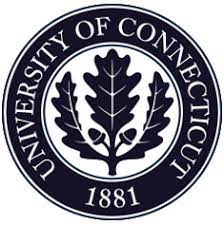
# TEAM - 4
# Title: Tracking Student Journey: Analyzing Retention and Graduation Rates

Team Members:
1. Venkata Siva Linga Sai Krishna Bondalapati
2. Bajram Lumani
3. Rohit Reddy Marreddy
4. Shriya Sudhakar Meshram
5. Siva Sobhan Prabhala
6. Deepak Pasala

Batch: Fall 2022


In [1]:
# Install the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### From your Google Drive:
Connect to google drive to access files from drive

In [2]:
# # # mount your google drive
# from google.colab import drive
# drive.mount('/content/drive')

## Connection to Drive
Connect to the google drive folder so that all teammates who had this file can able to access the files.

In [3]:
# you can also read from a shareable link or mount your Drive!
# https://docs.google.com/spreadsheets/d/1Ttbfibvs8YwePnaW35sMxu2Ld6W2BDtc/edit?usp=drive_link&ouid=109623433567696593538&rtpof=true&sd=true
!gdown 1Ttbfibvs8YwePnaW35sMxu2Ld6W2BDtc
# https://docs.google.com/spreadsheets/d/1l5Txw8wFN60fEzWFFpHW91rloe68NrnA/edit?usp=drive_link&ouid=109623433567696593538&rtpof=true&sd=true
!gdown 1l5Txw8wFN60fEzWFFpHW91rloe68NrnA
# https://docs.google.com/spreadsheets/d/1Zz3KIwzqYiN55pgrYMmrXNg8Uss9eXMp/edit?usp=drive_link&ouid=109623433567696593538&rtpof=true&sd=true
!gdown 1Zz3KIwzqYiN55pgrYMmrXNg8Uss9eXMp
# https://docs.google.com/spreadsheets/d/157Up5teh8K_PTqzmTi37MTDR7faplrIk/edit?usp=drive_link&ouid=109623433567696593538&rtpof=true&sd=true
!gdown 157Up5teh8K_PTqzmTi37MTDR7faplrIk

Downloading...
From: https://drive.google.com/uc?id=1Ttbfibvs8YwePnaW35sMxu2Ld6W2BDtc
To: /content/1. Student Retention data.xlsx
100% 32.2M/32.2M [00:01<00:00, 31.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l5Txw8wFN60fEzWFFpHW91rloe68NrnA
To: /content/2. Student GPA Tracking.xlsx
100% 9.45M/9.45M [00:00<00:00, 59.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Zz3KIwzqYiN55pgrYMmrXNg8Uss9eXMp
To: /content/3. Student Class Taking.xlsx
100% 97.5M/97.5M [00:00<00:00, 103MB/s]
Downloading...
From: https://drive.google.com/uc?id=157Up5teh8K_PTqzmTi37MTDR7faplrIk
To: /content/4-6. BAPM_Data_Export.xlsx
100% 13.9M/13.9M [00:00<00:00, 63.4MB/s]


# Read the Data

#1.Read the Student retention data

In [4]:
# Read the Student retention data
srd = pd.read_excel("/content/1. Student Retention data.xlsx")
srd.head()

,Level,FullPart,FstTimeCat,OIRE_FstTimeCat,gender,residency,entry_campus,entry_career,entry_career_sdesc,entry_program_sdesc,...,term_date_entry,term_date_degree,time_to_degree,dummy_id,sat_old_math_score,sat_old_verb_score,act_composite_score,sat_new_math_score,sat_new_verb_score,act_new_composite_score
0,Senior,Part-Time,UGTR,UGTR,Female,1.Connecticut,HRTFD,UGRD,Undergrad,Cont. Stds,...,2021-09-13,2022-05-07,0.647,3775426,NaN,NaN,NaN,NaN,NaN,NaN
1,Sophomore,Part-Time,UGTR,UGTR,Male,1.Connecticut,HRTFD,UGRD,Undergrad,Cont. Stds,...,2020-09-14,NaT,NaN,1060169,NaN,NaN,NaN,NaN,NaN,NaN
2,Senior,Full-Time,UGTR,UGTR,Female,1.Connecticut,STORR,UGRD,Undergrad,Pharmacy,...,2020-09-14,NaT,NaN,2140746,660.0,700.0,NaN,NaN,NaN,NaN
3,Junior,Full-Time,UGTR,UGTR,Female,1.Connecticut,STORR,UGRD,Undergrad,Business,...,2019-09-09,2020-07-24,0.874,910348,NaN,NaN,NaN,NaN,NaN,NaN
4,Freshman,Full-Time,UGTR,UGTR,Female,1.Connecticut,STORR,UGRD,Undergrad,Nursing,...,2022-01-31,2022-12-18,0.879,38462,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
srd['term_date_entry'].value_counts()

2020-09-14    6855
2022-09-12    6700
2018-09-10    6540
2021-09-13    6319
2019-09-09    6300
2020-02-03     490
2022-01-31     484
2019-02-04     468
2021-02-03     455
Name: term_date_entry, dtype: int64

In [6]:
# Finding no of rows and columns
srd.shape

(34611, 237)

UGFR = first-time freshman;

UGTR = transfer student;

RHFR = first-time freshman in a Ratcliffe Hicks program (associate's degree);

RHTR = transfer student in a Ratcliffe Hicks program (associate's degree).

JD -This is used to tie to IPEDS reporting.

In [7]:
srd['dummy_id'].nunique()

34600

In [8]:
# Info about the dataset
srd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34611 entries, 0 to 34610
Columns: 237 entries, Level to act_new_composite_score
dtypes: datetime64[ns](2), float64(60), int64(39), object(136)
memory usage: 62.6+ MB


In [9]:
# Replace the categorical values with correct format
srd['residency'] = srd['residency'].replace({"1.Connecticut":"connecticut","2.Out-of-State":"out_of_state",
                                                                   "3.Nonresident Alien":"nonresident alien"})

Remove the fall 2022 term because in order to know the retention_2 rate will be always zero because we don't have any data for spring 2023.

In [10]:
srd = srd[~srd['entry_term'].isin([1228])]
srd.head()

,Level,FullPart,FstTimeCat,OIRE_FstTimeCat,gender,residency,entry_campus,entry_career,entry_career_sdesc,entry_program_sdesc,...,term_date_entry,term_date_degree,time_to_degree,dummy_id,sat_old_math_score,sat_old_verb_score,act_composite_score,sat_new_math_score,sat_new_verb_score,act_new_composite_score
0,Senior,Part-Time,UGTR,UGTR,Female,connecticut,HRTFD,UGRD,Undergrad,Cont. Stds,...,2021-09-13,2022-05-07,0.647,3775426,NaN,NaN,NaN,NaN,NaN,NaN
1,Sophomore,Part-Time,UGTR,UGTR,Male,connecticut,HRTFD,UGRD,Undergrad,Cont. Stds,...,2020-09-14,NaT,NaN,1060169,NaN,NaN,NaN,NaN,NaN,NaN
2,Senior,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Pharmacy,...,2020-09-14,NaT,NaN,2140746,660.0,700.0,NaN,NaN,NaN,NaN
3,Junior,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Business,...,2019-09-09,2020-07-24,0.874,910348,NaN,NaN,NaN,NaN,NaN,NaN
4,Freshman,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Nursing,...,2022-01-31,2022-12-18,0.879,38462,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the missing values based on the columns types

### Integer columns

In [11]:
# Read only the columns with the 'int' data type columns
int_columns = srd.select_dtypes(include=['int'])
int_columns.head()

,entry_term,graduation_0_5,graduation_1_0,graduation_1_5,graduation_2_0,graduation_2_5,graduation_3_0,graduation_3_5,graduation_4_0,graduation_4_5,...,pell_2_0,pell_2_5,pell_3_0,pell_3_5,pell_4_0,pell_4_5,pell_5_0,pell_5_5,pell_6_0,dummy_id
0,1218,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3775426
1,1208,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1060169
2,1208,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2140746
3,1198,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,910348
4,1223,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,38462


From the above integer columns we don't need entry_term because it doesn't provide any information to proceed with the analysis.

In [12]:
# dropcollist1= ['entry_term']
# dropcollist1

In [13]:
# Filtering DataFrame where column start with 'retention'
grad_pell = [j for i,j in enumerate(srd.columns) if j.startswith('graduation') or j.startswith('pell')]
new_df = srd[grad_pell]
new_df.head()

,graduation_0_5,graduation_1_0,graduation_1_5,graduation_2_0,graduation_2_5,graduation_3_0,graduation_3_5,graduation_4_0,graduation_4_5,graduation_5_0,...,pell_1_5,pell_2_0,pell_2_5,pell_3_0,pell_3_5,pell_4_0,pell_4_5,pell_5_0,pell_5_5,pell_6_0
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
new_df.columns

Index(['graduation_0_5', 'graduation_1_0', 'graduation_1_5', 'graduation_2_0',
       'graduation_2_5', 'graduation_3_0', 'graduation_3_5', 'graduation_4_0',
       'graduation_4_5', 'graduation_5_0', 'graduation_5_5', 'graduation_6_0',
       'pell_0_5', 'pell_1_0', 'pell_1_5', 'pell_2_0', 'pell_2_5', 'pell_3_0',
       'pell_3_5', 'pell_4_0', 'pell_4_5', 'pell_5_0', 'pell_5_5', 'pell_6_0'],
      dtype='object')

In [15]:
# Info about the int columns
int_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27911 entries, 0 to 34178
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   entry_term      27911 non-null  int64
 1   graduation_0_5  27911 non-null  int64
 2   graduation_1_0  27911 non-null  int64
 3   graduation_1_5  27911 non-null  int64
 4   graduation_2_0  27911 non-null  int64
 5   graduation_2_5  27911 non-null  int64
 6   graduation_3_0  27911 non-null  int64
 7   graduation_3_5  27911 non-null  int64
 8   graduation_4_0  27911 non-null  int64
 9   graduation_4_5  27911 non-null  int64
 10  graduation_5_0  27911 non-null  int64
 11  graduation_5_5  27911 non-null  int64
 12  graduation_6_0  27911 non-null  int64
 13  retention_0_5   27911 non-null  int64
 14  retention_1_0   27911 non-null  int64
 15  retention_1_5   27911 non-null  int64
 16  retention_2_0   27911 non-null  int64
 17  retention_2_5   27911 non-null  int64
 18  retention_3_0   27911 non-

Insights:
All integer columns had no null values

### Categorical columns

In [16]:
# Filter the categorical columns
object_columns = srd.select_dtypes(include=["object"])
object_columns.head()

,Level,FullPart,FstTimeCat,OIRE_FstTimeCat,gender,residency,entry_campus,entry_career,entry_career_sdesc,entry_program_sdesc,...,term_sdesc_4_5,department_4_5,school_4_5,NSF_STEM_Category_4_5,prog_status_4_5,prog_action_4_5,prog_reason_4_5,First_Generation,CAPS_Flag,study_abroad
0,Senior,Part-Time,UGTR,UGTR,Female,connecticut,HRTFD,UGRD,Undergrad,Cont. Stds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1,Sophomore,Part-Time,UGTR,UGTR,Male,connecticut,HRTFD,UGRD,Undergrad,Cont. Stds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
2,Senior,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Pharmacy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
3,Junior,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
4,Freshman,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Nursing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


#### Cluster-1

In [17]:
# No of null values existed in categorical columns
null_columns = object_columns.columns[object_columns.isnull().any()]
null_columns.value_counts().sum()

117

In [18]:
# Read the first 30 columns to improve the display of all columns
nullcol_1 = object_columns[null_columns[0:30]]
nullcol_1.head()

,campus_0_5,career_0_5,career_sdesc_0_5,program_sdesc_0_5,plan_0_5,plan_sdesc_0_5,term_sdesc_0_5,department_0_5,school_0_5,NSF_STEM_Category_0_5,...,department_1_0,school_1_0,NSF_STEM_Category_1_0,prog_status_1_0,prog_action_1_0,prog_reason_1_0,campus_1_5,career_1_5,career_sdesc_1_5,program_sdesc_1_5
0,HRTFD,UGRD,Undergrad,Cont. Stds,GENSTD_BGS,Gnral Stds,Spring 2022,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,...,NaN,NaN,NaN,CM,COMP,GRAD,NaN,NaN,NaN,NaN
1,HRTFD,UGRD,Undergrad,Cont. Stds,GENSTD_BGS,Gnral Stds,Spring 2021,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,...,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,AC,DATA,CAMP,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,DC,VDIS,WTHD,NaN,NaN,NaN,NaN
3,STORR,UGRD,Undergrad,Business,REURBEC_BS,R E Urb Ec,Spring 2020,Finance,Business,Non-STEM,...,NaN,NaN,NaN,CM,COMP,GRAD,NaN,NaN,NaN,NaN
4,STORR,UGRD,Undergrad,Nursing,CEIN_BS,Nursing,Fall 2022,Nursing,Nursing,Non-STEM,...,NaN,NaN,NaN,CM,COMP,GRAD,NaN,NaN,NaN,NaN


In [19]:
for col in nullcol_1.columns:
  x = nullcol_1[col].value_counts().count()
  print(f"Total unique values in {col} = {x}")

Total unique values in campus_0_5 = 5
Total unique values in career_0_5 = 3
Total unique values in career_sdesc_0_5 = 3
Total unique values in program_sdesc_0_5 = 14
Total unique values in plan_0_5 = 146
Total unique values in plan_sdesc_0_5 = 127
Total unique values in term_sdesc_0_5 = 8
Total unique values in department_0_5 = 79
Total unique values in school_0_5 = 13
Total unique values in NSF_STEM_Category_0_5 = 11
Total unique values in prog_status_0_5 = 9
Total unique values in prog_action_0_5 = 15
Total unique values in prog_reason_0_5 = 44
Total unique values in campus_1_0 = 5
Total unique values in career_1_0 = 3
Total unique values in career_sdesc_1_0 = 3
Total unique values in program_sdesc_1_0 = 15
Total unique values in plan_1_0 = 151
Total unique values in plan_sdesc_1_0 = 134
Total unique values in term_sdesc_1_0 = 8
Total unique values in department_1_0 = 80
Total unique values in school_1_0 = 14
Total unique values in NSF_STEM_Category_1_0 = 11
Total unique values in pr

#### Drop columns from the cluster-1

career_0_5, department_1_0, plan_sdesc_1_0,
plan_sdesc_0_5,
plan_0_5




In [20]:
# Store cluster 1 unneccesary columns in a list
dropcollist2= ['career_0_5', 'department_1_0', 'plan_sdesc_1_0', 'plan_sdesc_0_5', 'plan_0_5']
dropcollist2

['career_0_5',
 'department_1_0',
 'plan_sdesc_1_0',
 'plan_sdesc_0_5',
 'plan_0_5']

In [21]:
# Descriptive stats
just = nullcol_1.describe()
just

,campus_0_5,career_0_5,career_sdesc_0_5,program_sdesc_0_5,plan_0_5,plan_sdesc_0_5,term_sdesc_0_5,department_0_5,school_0_5,NSF_STEM_Category_0_5,...,department_1_0,school_1_0,NSF_STEM_Category_1_0,prog_status_1_0,prog_action_1_0,prog_reason_1_0,campus_1_5,career_1_5,career_sdesc_1_5,program_sdesc_1_5
count,26303,26303,26303,26303,26303,26303,26303,26303,26303,26303,...,23915,23915,23915,27876,27876,21680,22573,22573,22573,22573
unique,5,3,3,14,146,127,8,79,13,11,...,80,14,11,9,15,46,5,3,3,15
top,STORR,UGRD,Undergrad,Arts & Sci,EXPLOR,Explortory,Spring 2021,CLAS - Other,Liberal Arts & Sciences,Non-STEM,...,CLAS - Other,Liberal Arts & Sciences,Non-STEM,AC,MATR,UDEP,STORR,UGRD,Undergrad,Arts & Sci
freq,18641,26163,26163,9528,5349,5266,6383,5162,14576,15932,...,3797,13160,14066,23288,11498,5652,17589,22402,22402,9623


In [22]:
# Find the column wise missing percent
diff1 = pd.DataFrame(len(nullcol_1)-just.iloc[0])
diff1.columns = ["Missing_count"]
diff1["%diff"] = [value/len(nullcol_1)*100 for value in diff1["Missing_count"]]
diff1

,Missing_count,%diff
campus_0_5,1608,5.761169
career_0_5,1608,5.761169
career_sdesc_0_5,1608,5.761169
program_sdesc_0_5,1608,5.761169
plan_0_5,1608,5.761169
plan_sdesc_0_5,1608,5.761169
term_sdesc_0_5,1608,5.761169
department_0_5,1608,5.761169
school_0_5,1608,5.761169
NSF_STEM_Category_0_5,1608,5.761169


#### Cluster-2

In [23]:
# No of null values existed in categorical columns from 30 to 60
nullcol_2 = object_columns[null_columns[30:60]]
nullcol_2.head()

,plan_1_5,plan_sdesc_1_5,term_sdesc_1_5,department_1_5,school_1_5,NSF_STEM_Category_1_5,prog_status_1_5,prog_action_1_5,prog_reason_1_5,campus_2_0,...,prog_action_2_0,prog_reason_2_0,campus_2_5,career_2_5,career_sdesc_2_5,program_sdesc_2_5,plan_2_5,plan_sdesc_2_5,term_sdesc_2_5,department_2_5
0,NaN,NaN,NaN,NaN,NaN,NaN,CM,COMP,GRAD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DC,VDIS,NREG,NaN,...,VDIS,NREG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,DC,VDIS,WTHD,NaN,...,VDIS,WTHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,CM,COMP,GRAD,NaN,...,COMP,GRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Descriptive stats
just1 = nullcol_2.describe()
just1

,plan_1_5,plan_sdesc_1_5,term_sdesc_1_5,department_1_5,school_1_5,NSF_STEM_Category_1_5,prog_status_1_5,prog_action_1_5,prog_reason_1_5,campus_2_0,...,prog_action_2_0,prog_reason_2_0,campus_2_5,career_2_5,career_sdesc_2_5,program_sdesc_2_5,plan_2_5,plan_sdesc_2_5,term_sdesc_2_5,department_2_5
count,22573,22573,22573,22573,22573,22573,27395,27395,23149,16003,...,21087,19828,15071,15071,15071,15071,15071,15071,15071,15071
unique,153,134,7,80,14,12,9,15,49,5,...,14,48,6,3,3,16,155,133,5,80
top,EXPLOR,Explortory,Spring 2022,CLAS - Other,Liberal Arts & Sciences,Non-STEM,AC,MATR,SREQ,STORR,...,PLNC,SREQ,STORR,UGRD,Undergrad,Arts & Sci,PSYCH_BA,Psych Sci,Spring 2023,Psychological Sciences
freq,2806,2120,5627,1875,11403,13043,22216,7917,5747,13755,...,6405,5106,13214,14999,14999,7084,938,1059,5016,1059


In [25]:
# Find the column wise missing percent
diff2 = pd.DataFrame(len(nullcol_2) -just1.iloc[0])
diff2.columns = ["Missing_count"]
diff2["%diff"] = [value/len(nullcol_2)*100 for value in diff2["Missing_count"]]
diff2 = diff2.reset_index()
diff2

,index,Missing_count,%diff
0,plan_1_5,5338,19.125076
1,plan_sdesc_1_5,5338,19.125076
2,term_sdesc_1_5,5338,19.125076
3,department_1_5,5338,19.125076
4,school_1_5,5338,19.125076
5,NSF_STEM_Category_1_5,5338,19.125076
6,prog_status_1_5,516,1.848733
7,prog_action_1_5,516,1.848733
8,prog_reason_1_5,4762,17.061374
9,campus_2_0,11908,42.664183


#### Drop all columns in cluster-2 whose null values are greater than 30

In [26]:
# Store cluster 2 unneccesary columns in a list
dropcollist3 = diff2['index'].to_list()
# Adding prevoius previous drop columns list to new list
dropcollist3 = dropcollist2 + dropcollist3
len(dropcollist3)

35

#### Cluster-3

In [27]:
# No of null values existed in categorical columns from 60 to 90
nullcol_3 = object_columns[null_columns[60:90]]
nullcol_3.head()

,school_2_5,NSF_STEM_Category_2_5,prog_status_2_5,prog_action_2_5,prog_reason_2_5,campus_3_0,career_3_0,career_sdesc_3_0,program_sdesc_3_0,plan_3_0,...,career_sdesc_3_5,program_sdesc_3_5,plan_3_5,plan_sdesc_3_5,term_sdesc_3_5,department_3_5,school_3_5,NSF_STEM_Category_3_5,prog_status_3_5,prog_action_3_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,DC,VDIS,NREG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,DC,VDIS,WTHD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,CM,COMP,GRAD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CM,COMP
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Descriptive stats
just2 = nullcol_3.describe()
just2

,school_2_5,NSF_STEM_Category_2_5,prog_status_2_5,prog_action_2_5,prog_reason_2_5,campus_3_0,career_3_0,career_sdesc_3_0,program_sdesc_3_0,plan_3_0,...,career_sdesc_3_5,program_sdesc_3_5,plan_3_5,plan_sdesc_3_5,term_sdesc_3_5,department_3_5,school_3_5,NSF_STEM_Category_3_5,prog_status_3_5,prog_action_3_5
count,15071,15071,20632,20632,19793,8953,8953,8953,8953,8953,...,8046,8046,8046,8046,8046,8046,8046,8046,13299,13299
unique,15,11,8,14,46,6,3,3,15,149,...,3,16,146,125,3,76,15,11,8,14
top,Liberal Arts & Sciences,Non-STEM,AC,PLNC,SREQ,STORR,UGRD,Undergrad,Arts & Sci,PSYCH_BA,...,Undergrad,Arts & Sci,PSYCH_BA,Psych Sci,Spring 2022,Psychological Sciences,Liberal Arts & Sciences,Non-STEM,AC,DATA
freq,7255,8448,14956,6698,4519,8023,8913,8913,4241,555,...,8009,3761,488,533,4089,533,3761,4351,8076,4837


In [29]:
# Find the column wise missing percent
diff3 = pd.DataFrame(len(nullcol_3)- just2.iloc[0])
diff3.columns = ["Missing_count"]
diff3["%diff"] = [value/len(nullcol_3)*100 for value in diff3["Missing_count"]]
diff3 = diff3.reset_index()
diff3

,index,Missing_count,%diff
0,school_2_5,12840,46.003368
1,NSF_STEM_Category_2_5,12840,46.003368
2,prog_status_2_5,7279,26.079324
3,prog_action_2_5,7279,26.079324
4,prog_reason_2_5,8118,29.085307
5,campus_3_0,18958,67.923041
6,career_3_0,18958,67.923041
7,career_sdesc_3_0,18958,67.923041
8,program_sdesc_3_0,18958,67.923041
9,plan_3_0,18958,67.923041


#### Drop all columns in cluster-3 whose null values are greater than 30

In [30]:
# Store cluster 3 unneccesary columns in a list
dropcollist4 = diff3['index'].to_list()
# Adding prevoius previous drop columns list to new list
dropcollist4 = dropcollist3 + dropcollist4
# dropcollist4

#### Cluster-4

In [31]:
# No of null values existed in categorical columns from above 90 to end
nullcol_4 = object_columns[null_columns[90:]]
nullcol_4.head()

,prog_reason_3_5,campus_4_0,career_4_0,career_sdesc_4_0,program_sdesc_4_0,plan_4_0,plan_sdesc_4_0,term_sdesc_4_0,department_4_0,school_4_0,...,program_sdesc_4_5,plan_4_5,plan_sdesc_4_5,term_sdesc_4_5,department_4_5,school_4_5,NSF_STEM_Category_4_5,prog_status_4_5,prog_action_4_5,prog_reason_4_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Descriptive stats
just3 = nullcol_4.describe()
just3

,prog_reason_3_5,campus_4_0,career_4_0,career_sdesc_4_0,program_sdesc_4_0,plan_4_0,plan_sdesc_4_0,term_sdesc_4_0,department_4_0,school_4_0,...,program_sdesc_4_5,plan_4_5,plan_sdesc_4_5,term_sdesc_4_5,department_4_5,school_4_5,NSF_STEM_Category_4_5,prog_status_4_5,prog_action_4_5,prog_reason_4_5
count,13194,943,943,943,943,943,943,943,943,943,...,605,605,605,605,605,605,605,6535,6535,6509
unique,46,6,2,2,17,122,104,2,70,16,...,15,108,92,1,65,14,11,7,13,40
top,CANS,STORR,UGRD,Undergrad,Arts & Sci,ECONOM1_BA,Economics,Fall 2022,Economics,Liberal Arts & Sciences,...,Arts & Sci,ECONOM1_BA,Economics,Spring 2023,Economics,Liberal Arts & Sciences,Non-STEM,CM,COMP,GRAD
freq,4264,728,914,914,504,67,76,914,76,504,...,295,45,47,605,47,295,354,4291,4291,4320


In [33]:
# Find the column wise missing percent
diff4 = pd.DataFrame(len(nullcol_4)- just3.iloc[0])
diff4.columns = ["Missing_count"]
diff4["%diff"] = [value/len(nullcol_4)*100 for value in diff4["Missing_count"]]
diff4

,Missing_count,%diff
prog_reason_3_5,14717,52.728315
campus_4_0,26968,96.621404
career_4_0,26968,96.621404
career_sdesc_4_0,26968,96.621404
program_sdesc_4_0,26968,96.621404
plan_4_0,26968,96.621404
plan_sdesc_4_0,26968,96.621404
term_sdesc_4_0,26968,96.621404
department_4_0,26968,96.621404
school_4_0,26968,96.621404


### Float Columns

In [34]:
#Read only the columns with the 'int' data type columns
float_columns = srd.select_dtypes(include=['float'])
float_columns.head()

,term_0_5,term_1_0,term_1_5,term_2_0,term_2_5,term_3_0,term_3_5,term_4_0,term_4_5,campus_5_0,...,prog_reason_6_0,Honors_Flag,COMPLETION_YEAR,time_to_degree,sat_old_math_score,sat_old_verb_score,act_composite_score,sat_new_math_score,sat_new_verb_score,act_new_composite_score
0,1223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021.0,0.647,NaN,NaN,NaN,NaN,NaN,NaN
1,1213.0,1218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,660.0,700.0,NaN,NaN,NaN,NaN
3,1203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2020.0,0.874,NaN,NaN,NaN,NaN,NaN,NaN
4,1228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2022.0,0.879,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Find the column wise missing percent
des = float_columns.describe()
diff_f = pd.DataFrame(len(float_columns)- des.iloc[0])
diff_f.columns = ["Missing_count"]
diff_f["%diff"] = [value/len(nullcol_4)*100 for value in diff_f["Missing_count"]]
diff_f = diff_f.reset_index()
diff_f

,index,Missing_count,%diff
0,term_0_5,1608.0,5.761169
1,term_1_0,3996.0,14.316936
2,term_1_5,5338.0,19.125076
3,term_2_0,11908.0,42.664183
4,term_2_5,12840.0,46.003368
5,term_3_0,18958.0,67.923041
6,term_3_5,19865.0,71.172656
7,term_4_0,26968.0,96.621404
8,term_4_5,27306.0,97.832396
9,campus_5_0,27911.0,100.000000


#### Drop all columns in cluster-4 whose null values are greater than 30

In [36]:
# Convert index column from dataframe into list
dropcollist5 = diff_f['index'].to_list()
# removing the column based on the index in the list
dropcollist5.pop(57)
dropcollist5.pop(58)
# Adding prevoius previous drop columns list to new list
dropcollist5 = dropcollist4 + dropcollist5
# dropcollist5

### Final student retention dataset after dropping all unnecessary data

In [37]:
# Drop columns from retention data with dropcollist5
new_srd = srd.drop(columns=dropcollist5)
new_srd.head()

,Level,FullPart,FstTimeCat,OIRE_FstTimeCat,gender,residency,entry_campus,entry_career,entry_career_sdesc,entry_program_sdesc,...,pell_5_5,pell_6_0,First_Generation,CAPS_Flag,study_abroad,term_date_entry,term_date_degree,dummy_id,sat_new_math_score,act_new_composite_score
0,Senior,Part-Time,UGTR,UGTR,Female,connecticut,HRTFD,UGRD,Undergrad,Cont. Stds,...,0,0,N,N,N,2021-09-13,2022-05-07,3775426,NaN,NaN
1,Sophomore,Part-Time,UGTR,UGTR,Male,connecticut,HRTFD,UGRD,Undergrad,Cont. Stds,...,0,0,N,N,N,2020-09-14,NaT,1060169,NaN,NaN
2,Senior,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Pharmacy,...,0,0,N,N,N,2020-09-14,NaT,2140746,NaN,NaN
3,Junior,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Business,...,0,0,N,N,N,2019-09-09,2020-07-24,910348,NaN,NaN
4,Freshman,Full-Time,UGTR,UGTR,Female,connecticut,STORR,UGRD,Undergrad,Nursing,...,0,0,N,N,N,2022-01-31,2022-12-18,38462,NaN,NaN


Drop the columns like
'FstTimeCat', 'OIRE_FstTimeCat','entry_career_sdesc',
       'entry_program_sdesc', 'entry_plan', 'entry_plan_sdesc',
       'entry_term_sdesc', 'entry_department',

In [38]:
# Drop this columns as they are redundant
new_srd = new_srd.drop(columns=['FstTimeCat', 'OIRE_FstTimeCat','entry_career_sdesc', 'entry_program_sdesc',
                            'entry_plan', 'entry_plan_sdesc', 'entry_term_sdesc','entry_department'
                            ,'entry_NSF_STEM_Category','term_date_entry',	'term_date_degree'])
new_srd.head()

,Level,FullPart,gender,residency,entry_campus,entry_career,entry_term,entry_school,graduation_0_5,graduation_1_0,...,pell_4_5,pell_5_0,pell_5_5,pell_6_0,First_Generation,CAPS_Flag,study_abroad,dummy_id,sat_new_math_score,act_new_composite_score
0,Senior,Part-Time,Female,connecticut,HRTFD,UGRD,1218,Center for Excellence in Teaching & Learning,0,1,...,0,0,0,0,N,N,N,3775426,NaN,NaN
1,Sophomore,Part-Time,Male,connecticut,HRTFD,UGRD,1208,Center for Excellence in Teaching & Learning,0,0,...,0,0,0,0,N,N,N,1060169,NaN,NaN
2,Senior,Full-Time,Female,connecticut,STORR,UGRD,1208,Pharmacy,0,0,...,0,0,0,0,N,N,N,2140746,NaN,NaN
3,Junior,Full-Time,Female,connecticut,STORR,UGRD,1198,Business,0,1,...,0,0,0,0,N,N,N,910348,NaN,NaN
4,Freshman,Full-Time,Female,connecticut,STORR,UGRD,1223,Nursing,0,1,...,0,0,0,0,N,N,N,38462,NaN,NaN


In [39]:
# Replace Numeric Binary values in place of category binary values
few_cols = ['First_Generation','CAPS_Flag',	'study_abroad']
for cols in few_cols:
  new_srd[cols] = new_srd[cols].replace(["Y","N"],[1,0])

In [40]:
# Filter the all columns except first 7 columns to drop
dummy_columns = new_srd.select_dtypes(include=["object"])
dummy_columns_1 = dummy_columns.iloc[0:,7:]
dummy_columns_1

,campus_0_5,career_sdesc_0_5,program_sdesc_0_5,term_sdesc_0_5,department_0_5,school_0_5,NSF_STEM_Category_0_5,prog_status_0_5,prog_action_0_5,prog_reason_0_5,...,program_sdesc_4_5,plan_4_5,plan_sdesc_4_5,term_sdesc_4_5,department_4_5,school_4_5,NSF_STEM_Category_4_5,prog_status_4_5,prog_action_4_5,prog_reason_4_5
0,HRTFD,Undergrad,Cont. Stds,Spring 2022,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,AC,DATA,CANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HRTFD,Undergrad,Cont. Stds,Spring 2021,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,AC,DATA,CAMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,VDIS,WTHD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STORR,Undergrad,Business,Spring 2020,Finance,Business,Non-STEM,AC,MATR,UDEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STORR,Undergrad,Nursing,Fall 2022,Nursing,Nursing,Non-STEM,AC,DATA,CANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33696,STORR,Undergrad,Cont. Stds,Fall 2022,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,AC,PRGC,SREQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33810,STORR,Undergrad,Cont. Stds,Fall 2022,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,AC,PRGC,SREQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33839,STORR,Undergrad,Cont. Stds,Fall 2022,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,AC,PRGC,SREQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34160,STORR,Undergrad,Cont. Stds,Fall 2022,Center for Excellence in Teaching & Learning,Center for Excellence in Teaching & Learning,Non-STEM,AC,PRGC,SREQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Drop the unwanted columns
new_srd = new_srd.drop(columns=dummy_columns_1)
new_srd.head()

,Level,FullPart,gender,residency,entry_campus,entry_career,entry_term,entry_school,graduation_0_5,graduation_1_0,...,pell_4_5,pell_5_0,pell_5_5,pell_6_0,First_Generation,CAPS_Flag,study_abroad,dummy_id,sat_new_math_score,act_new_composite_score
0,Senior,Part-Time,Female,connecticut,HRTFD,UGRD,1218,Center for Excellence in Teaching & Learning,0,1,...,0,0,0,0,0,0,0,3775426,NaN,NaN
1,Sophomore,Part-Time,Male,connecticut,HRTFD,UGRD,1208,Center for Excellence in Teaching & Learning,0,0,...,0,0,0,0,0,0,0,1060169,NaN,NaN
2,Senior,Full-Time,Female,connecticut,STORR,UGRD,1208,Pharmacy,0,0,...,0,0,0,0,0,0,0,2140746,NaN,NaN
3,Junior,Full-Time,Female,connecticut,STORR,UGRD,1198,Business,0,1,...,0,0,0,0,0,0,0,910348,NaN,NaN
4,Freshman,Full-Time,Female,connecticut,STORR,UGRD,1223,Nursing,0,1,...,0,0,0,0,0,0,0,38462,NaN,NaN


In [42]:
new_srd['pell_grant'] = new_srd[['pell_0_5', 'pell_1_0', 'pell_1_5', 'pell_2_0']].mean(axis=1)

In [43]:
# Creating a new column from pell grant into bins based on certain criteria
def category(grant):
  if grant == 0:
    return 'recieved no pell grant'
  elif grant >0 and grant <= 0.25:
    return 'recieved pell grant upto 1 semester'
  elif grant >0.25 and grant <=0.50:
    return 'recieved pell grant upto 2 semesters'
  elif grant >0.50 and grant <=0.75:
    return 'recieved pell grant upto 3 semesters'
  elif grant >0.75 and grant <=1.0:
    return 'recieved pell grant upto 4 semesters'

new_srd['pell_grant_dis'] = new_srd['pell_grant'].apply(category)

In [44]:
# We don't need this data because we are focused upto retention 2_0
drop_columns_2 = ['entry_career','entry_pell', 'pell_0_5', 'pell_1_0',
       'pell_1_5', 'pell_2_5', 'pell_3_0', 'pell_3_5', 'pell_4_0',
       'pell_4_5', 'pell_5_0', 'pell_5_5', 'pell_6_0',
       'CAPS_Flag', 'study_abroad','sat_new_math_score',
       'act_new_composite_score']

new_srd = new_srd.drop(columns=drop_columns_2)
new_srd.head()

,Level,FullPart,gender,residency,entry_campus,entry_term,entry_school,graduation_0_5,graduation_1_0,graduation_1_5,...,retention_4_0,retention_4_5,retention_5_0,retention_5_5,retention_6_0,pell_2_0,First_Generation,dummy_id,pell_grant,pell_grant_dis
0,Senior,Part-Time,Female,connecticut,HRTFD,1218,Center for Excellence in Teaching & Learning,0,1,1,...,0,0,0,0,0,0,0,3775426,0.00,recieved no pell grant
1,Sophomore,Part-Time,Male,connecticut,HRTFD,1208,Center for Excellence in Teaching & Learning,0,0,0,...,0,0,0,0,0,0,0,1060169,0.25,recieved pell grant upto 1 semester
2,Senior,Full-Time,Female,connecticut,STORR,1208,Pharmacy,0,0,0,...,0,0,0,0,0,0,0,2140746,0.00,recieved no pell grant
3,Junior,Full-Time,Female,connecticut,STORR,1198,Business,0,1,1,...,0,0,0,0,0,0,0,910348,0.00,recieved no pell grant
4,Freshman,Full-Time,Female,connecticut,STORR,1223,Nursing,0,1,1,...,0,0,0,0,0,0,0,38462,0.00,recieved no pell grant


### Retention data for **visualization**

In [45]:
# Store new_srd retention datasdet in retention_data to use for visualization
retention_data = new_srd

In [46]:
# Replace Numeric Binary values in place of category binary values
new_srd['gender'] = new_srd['gender'].replace({'Male':0,'Female':1})
new_srd['FullPart'] = new_srd['FullPart'].replace({'Part-Time':0,'Full-Time':1})

In [47]:
# Creating dummy_columns for categroical columns available in the final retention data
dummy_columns = new_srd.select_dtypes(include=["object"])
for cols in dummy_columns.columns:
  new_srd = pd.get_dummies(new_srd, columns =[cols], prefix='col')

#2.Read the Student GPA Tracking data

In [48]:
# Read the Student GPA Tracking data
sgt = pd.read_excel("/content/2. Student GPA Tracking.xlsx")
sgt.head()

,strm1,strm2,strm3,strm4,strm5,strm6,strm7,strm8,strm9,strm10,...,Total_Passed_Credits_4,Total_Passed_Credits_5,Total_Passed_Credits_6,Total_Passed_Credits_7,Total_Passed_Credits_8,Total_Passed_Credits_9,Total_Passed_Credits_10,Total_Passed_Credits_11,Total_Passed_Credits_12,dummy_id
0,1228,1233,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939709
1,1233,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2228846
2,1198,1208,1213,1218,1223,.,.,.,.,.,...,73.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2648432
3,1223,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2735645
4,1228,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3997623


In [49]:
# Drop the fall 2022 and spring 2023 semester data
# fall 2022 is the last semester so there wont be any retention after this semester
sgt = sgt[~sgt['strm1'].isin([1228,1233])]
sgt.head()

,strm1,strm2,strm3,strm4,strm5,strm6,strm7,strm8,strm9,strm10,...,Total_Passed_Credits_4,Total_Passed_Credits_5,Total_Passed_Credits_6,Total_Passed_Credits_7,Total_Passed_Credits_8,Total_Passed_Credits_9,Total_Passed_Credits_10,Total_Passed_Credits_11,Total_Passed_Credits_12,dummy_id
2,1198,1208,1213,1218,1223,.,.,.,.,.,...,73.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2648432
3,1223,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2735645
5,1198,1203,1208,1213,1218,1223,1228,1233,.,.,...,122.0,125.0,137.0,144.0,147.0,NaN,NaN,NaN,NaN,3065134
6,1218,1223,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775426
7,1198,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600164


In [50]:
# Finding the missing value counts and its patterns with respect to other columns
for col in sgt.columns:
  print(f'{col} had {round((sgt[col].isnull().sum())/len(sgt),2)} missing values')

strm1 had 0.0 missing values
strm2 had 0.0 missing values
strm3 had 0.0 missing values
strm4 had 0.0 missing values
strm5 had 0.0 missing values
strm6 had 0.0 missing values
strm7 had 0.0 missing values
strm8 had 0.0 missing values
strm9 had 0.0 missing values
strm10 had 0.0 missing values
strm11 had 0.0 missing values
strm12 had 0.0 missing values
Semester_GPA_1 had 0.0 missing values
Semester_GPA_2 had 0.02 missing values
Semester_GPA_3 had 0.1 missing values
Semester_GPA_4 had 0.17 missing values
Semester_GPA_5 had 0.41 missing values
Semester_GPA_6 had 0.46 missing values
Semester_GPA_7 had 0.68 missing values
Semester_GPA_8 had 0.72 missing values
Semester_GPA_9 had 0.97 missing values
Semester_GPA_10 had 0.98 missing values
Semester_GPA_11 had 1.0 missing values
Semester_GPA_12 had 1.0 missing values
Cumulative_GPA_1 had 0.0 missing values
Cumulative_GPA_2 had 0.02 missing values
Cumulative_GPA_3 had 0.1 missing values
Cumulative_GPA_4 had 0.17 missing values
Cumulative_GPA_5 had

#### Final Student GPA dataset

In [51]:
# Drop teh semester columns becuase we already have this columns in retention dataset
new_sgt = sgt.drop(columns=['strm1','strm2', 'strm3', 'strm4', 'strm5', 'strm6', 'strm7', 'strm8', 'strm9',
       'strm10', 'strm11', 'strm12'])
new_sgt.head()

,Semester_GPA_1,Semester_GPA_2,Semester_GPA_3,Semester_GPA_4,Semester_GPA_5,Semester_GPA_6,Semester_GPA_7,Semester_GPA_8,Semester_GPA_9,Semester_GPA_10,...,Total_Passed_Credits_4,Total_Passed_Credits_5,Total_Passed_Credits_6,Total_Passed_Credits_7,Total_Passed_Credits_8,Total_Passed_Credits_9,Total_Passed_Credits_10,Total_Passed_Credits_11,Total_Passed_Credits_12,dummy_id
2,0.0,3.82,3.7,4.00,0.0,NaN,NaN,NaN,NaN,NaN,...,73.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2648432
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2735645
5,2.7,3.35,3.0,2.93,2.3,3.25,3.3,1.7,NaN,NaN,...,122.0,125.0,137.0,144.0,147.0,NaN,NaN,NaN,NaN,3065134
6,4.0,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775426
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600164


In [52]:
# Fill null values with 0
new_sgt = new_sgt.fillna(0)
new_sgt.head()

,Semester_GPA_1,Semester_GPA_2,Semester_GPA_3,Semester_GPA_4,Semester_GPA_5,Semester_GPA_6,Semester_GPA_7,Semester_GPA_8,Semester_GPA_9,Semester_GPA_10,...,Total_Passed_Credits_4,Total_Passed_Credits_5,Total_Passed_Credits_6,Total_Passed_Credits_7,Total_Passed_Credits_8,Total_Passed_Credits_9,Total_Passed_Credits_10,Total_Passed_Credits_11,Total_Passed_Credits_12,dummy_id
2,0.0,3.82,3.7,4.00,0.0,0.00,0.0,0.0,0.0,0.0,...,73.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2648432
3,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2735645
5,2.7,3.35,3.0,2.93,2.3,3.25,3.3,1.7,0.0,0.0,...,122.0,125.0,137.0,144.0,147.0,0.0,0.0,0.0,0.0,3065134
6,4.0,3.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3775426
7,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600164


In [53]:
# Filter few columns which are necessary for the analysis
new_sgt = new_sgt[['Semester_GPA_2','TOT_TRNSFR_2',
                   'Total_Passed_Credits_2','dummy_id']]
new_sgt.head()

,Semester_GPA_2,TOT_TRNSFR_2,Total_Passed_Credits_2,dummy_id
2,3.82,21.0,63.0,2648432
3,0.00,0.0,0.0,2735645
5,3.35,59.0,100.0,3065134
6,3.00,84.0,42.0,3775426
7,0.00,0.0,0.0,600164


In [54]:
# count the
new_sgt['dummy_id'].nunique()

27904

In [55]:
# Merge the retention_data to GPA file for visualization
visual_file = pd.merge(retention_data,new_sgt, on='dummy_id')
visual_file.head()

,Level,FullPart,gender,residency,entry_campus,entry_term,entry_school,graduation_0_5,graduation_1_0,graduation_1_5,...,retention_5_5,retention_6_0,pell_2_0,First_Generation,dummy_id,pell_grant,pell_grant_dis,Semester_GPA_2,TOT_TRNSFR_2,Total_Passed_Credits_2
0,Senior,0,1,connecticut,HRTFD,1218,Center for Excellence in Teaching & Learning,0,1,1,...,0,0,0,0,3775426,0.00,recieved no pell grant,3.000,84.0,42.0
1,Sophomore,0,0,connecticut,HRTFD,1208,Center for Excellence in Teaching & Learning,0,0,0,...,0,0,0,0,1060169,0.25,recieved pell grant upto 1 semester,2.990,45.0,28.0
2,Senior,1,1,connecticut,STORR,1208,Pharmacy,0,0,0,...,0,0,0,0,2140746,0.00,recieved no pell grant,0.000,0.0,0.0
3,Junior,1,1,connecticut,STORR,1198,Business,0,1,1,...,0,0,0,0,910348,0.00,recieved no pell grant,3.750,76.0,32.0
4,Freshman,1,1,connecticut,STORR,1223,Nursing,0,1,1,...,0,0,0,0,38462,0.00,recieved no pell grant,3.627,0.0,45.0


In [56]:
# Merge the new_srd, new_sgt for modeling
merge_file1 = pd.merge(new_srd,new_sgt, on='dummy_id')
merge_file1.head()

,FullPart,gender,entry_term,graduation_0_5,graduation_1_0,graduation_1_5,graduation_2_0,graduation_2_5,graduation_3_0,graduation_3_5,...,col_Ratcliffe Hicks,col_Social Work,col_recieved no pell grant,col_recieved pell grant upto 1 semester,col_recieved pell grant upto 2 semesters,col_recieved pell grant upto 3 semesters,col_recieved pell grant upto 4 semesters,Semester_GPA_2,TOT_TRNSFR_2,Total_Passed_Credits_2
0,0,1,1218,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,3.000,84.0,42.0
1,0,0,1208,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2.990,45.0,28.0
2,1,1,1208,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.000,0.0,0.0
3,1,1,1198,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,3.750,76.0,32.0
4,1,1,1223,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,3.627,0.0,45.0


#3.Read the Student class Taking data

In [57]:
# Read the Student Class Taking
sct = pd.read_excel("/content/3. Student Class Taking.xlsx")
sct.head()

,subject_campus,Subject_School_College,Subject_Department,SUBJECT,CATALOG_NBR,SESSION_CODE,UNT_TAKEN,CRSE_GRADE_OFF,CTERM_TERM_CD,CTERM_TERM_SDESC,...,Sex,First_Generation,Pell_grant,Honors_Flag,CAPS_Flag,NSF_STEM_Category,STEM,classification,Academic_Standing,dummy_id
0,STORR,Nursing,Nursing,NURS,4265,1,3.0,A,1193,Spring 2019,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315
1,STORR,Nursing,Nursing,NURS,4292,1,6.0,A,1193,Spring 2019,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315
2,STORR,Nursing,Nursing,NURS,4235,1,3.0,A,1193,Spring 2019,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315
3,STORR,Nursing,Nursing,NURS,3334,1,7.0,A,1188,Fall 2018,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315
4,STORR,Nursing,Nursing,NURS,3715W,1,3.0,A,1188,Fall 2018,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315


In [58]:
sct.shape

(991847, 23)

# Considering the Grade of
A,
A-,
B,
B+,
B-,
C,
C+,C-,D+,D,D-,F

for furthur analsysis

In [59]:
sct = sct[sct['CRSE_GRADE_OFF'].isin(['A', 'A-', 'B', 'B+', 'B-', 'C', 'C+','F','C-','D+','D','D-','W','P','F','P@','F@'])]
sct = sct.reset_index()
sct = sct.drop(columns = ['index'])
sct.head()

,subject_campus,Subject_School_College,Subject_Department,SUBJECT,CATALOG_NBR,SESSION_CODE,UNT_TAKEN,CRSE_GRADE_OFF,CTERM_TERM_CD,CTERM_TERM_SDESC,...,Sex,First_Generation,Pell_grant,Honors_Flag,CAPS_Flag,NSF_STEM_Category,STEM,classification,Academic_Standing,dummy_id
0,STORR,Nursing,Nursing,NURS,4265,1,3.0,A,1193,Spring 2019,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315
1,STORR,Nursing,Nursing,NURS,4292,1,6.0,A,1193,Spring 2019,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315
2,STORR,Nursing,Nursing,NURS,4235,1,3.0,A,1193,Spring 2019,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315
3,STORR,Nursing,Nursing,NURS,3334,1,7.0,A,1188,Fall 2018,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315
4,STORR,Nursing,Nursing,NURS,3715W,1,3.0,A,1188,Fall 2018,...,Female,N,N,N,N,Non-STEM,Non-STEM,Senior,Good Standing,2240315


In [60]:
sct.shape

(955081, 23)

In [61]:
# Repalce N with 0 and y with 1
sct = sct.replace({'N':0, 'Y':1})

Decided to drop Subject_Department, SUBJECT, STRUC_ACAD_PLAN,CCAMPUS columns because they are redundant columns which dont need for furthur analysis

Drop the CATALOG_NBR, CTERM_TERM_CD column which is a class category column doesnot give any information. so we decided to drop this for furthur analysis

Drop the SESSION_CODE column becuasee it had 100% accuarcy of all sessions are ion 1 so we dont need this columns which give direct probability.

Drop the NSF_STEM_Category column because we already have similar column which provides information.

Keep the Stem column so that we can filter the programs based on certain categrory to get business insights

Drop CRSE_GRADE_OFF columns becuase it had 29 unique values which make more confusion to the dataset after converting them into dummy variables

Drop Honors_Flag, CAPS_Flag columns more than 90% values are no that means this columns are not used predicting the target variable


In [62]:
# Final version of Dataset after droping unnecessary columns
# define the drop columns in a list
columns_todrop=['SUBJECT','CATALOG_NBR','CTERM_TERM_CD','CCAMPUS','STRUC_ACAD_PLAN',
                'NSF_STEM_Category','SESSION_CODE','Honors_Flag','CAPS_Flag']
# Drop the columns
new_sct = sct.drop(columns=columns_todrop)
new_sct.head()

,subject_campus,Subject_School_College,Subject_Department,UNT_TAKEN,CRSE_GRADE_OFF,CTERM_TERM_SDESC,FullPart,Sex,First_Generation,Pell_grant,STEM,classification,Academic_Standing,dummy_id
0,STORR,Nursing,Nursing,3.0,A,Spring 2019,Full-Time,Female,0,0,Non-STEM,Senior,Good Standing,2240315
1,STORR,Nursing,Nursing,6.0,A,Spring 2019,Full-Time,Female,0,0,Non-STEM,Senior,Good Standing,2240315
2,STORR,Nursing,Nursing,3.0,A,Spring 2019,Full-Time,Female,0,0,Non-STEM,Senior,Good Standing,2240315
3,STORR,Nursing,Nursing,7.0,A,Fall 2018,Full-Time,Female,0,0,Non-STEM,Senior,Good Standing,2240315
4,STORR,Nursing,Nursing,3.0,A,Fall 2018,Full-Time,Female,0,0,Non-STEM,Senior,Good Standing,2240315


In [63]:
# Final version of Dataset after droping unnecessary columns
# define the drop columns in a list
columns_todrop1=['subject_campus','Subject_School_College','classification','FullPart','Sex','First_Generation']
# Drop the columns
new_sct = new_sct.drop(columns=columns_todrop1)
new_sct.head()

,Subject_Department,UNT_TAKEN,CRSE_GRADE_OFF,CTERM_TERM_SDESC,Pell_grant,STEM,Academic_Standing,dummy_id
0,Nursing,3.0,A,Spring 2019,0,Non-STEM,Good Standing,2240315
1,Nursing,6.0,A,Spring 2019,0,Non-STEM,Good Standing,2240315
2,Nursing,3.0,A,Spring 2019,0,Non-STEM,Good Standing,2240315
3,Nursing,7.0,A,Fall 2018,0,Non-STEM,Good Standing,2240315
4,Nursing,3.0,A,Fall 2018,0,Non-STEM,Good Standing,2240315


In [64]:
# Final columns required from class taking data
new_sct = new_sct[['STEM','Academic_Standing','CRSE_GRADE_OFF','dummy_id']]

In [65]:
# Count the unique dummy_id
new_sct['dummy_id'].nunique()

51595

We consolidate or aggregate information for each unique 'dummy_id' and combine the multiple rows related to the same 'dummy_id' into a single row, we want to perform data aggregation or grouping based on the 'dummy_id'

In [66]:
# Pivot the table to make dummy id as index to eliminate he redundancy problem
pivot_df = pd.pivot_table(new_sct, index='dummy_id', columns='CRSE_GRADE_OFF',
                          aggfunc='size', fill_value=0).reset_index()

# Display the pivoted DataFrame
display(pivot_df.head())

CRSE_GRADE_OFF,dummy_id,A,A-,B,B+,B-,C,C+,C-,D,D+,D-,F,F@,P@,W
0,7,3,0,1,0,0,3,2,0,0,1,1,1,0,0,0
1,40,4,2,1,0,1,0,2,0,2,1,0,0,0,0,0
2,269,1,7,4,2,1,1,2,0,1,1,0,0,0,0,1
3,364,2,3,4,1,0,2,0,0,0,1,0,1,0,1,1
4,388,1,1,2,3,0,4,1,0,1,0,0,0,0,0,0


In [67]:
# Filter Stem and dummy_id
filter1 = new_sct[['dummy_id','STEM']]
# Filter Stem and Academic_Standing
filter2 = new_sct[['dummy_id','Academic_Standing']]
# Pivot the table to make dummy id as index to eliminate he redundancy problem
pivot_1 = pd.pivot_table(filter1,index='dummy_id', columns='STEM',values='STEM',
                          aggfunc='size', fill_value=0).reset_index()
pivot_2 = pd.pivot_table(filter2,index='dummy_id', columns='Academic_Standing',values='Academic_Standing',
                          aggfunc='size', fill_value=0).reset_index()

In [68]:
# merge combine with main pivot_df grade dataframe
new_sct = pd.merge(pivot_df,pivot_2, on='dummy_id')
new_sct.head()

,dummy_id,A,A-,B,B+,B-,C,C+,C-,D,D+,D-,F,F@,P@,W,Good Standing,Scholastic Probation,Scholastic Warning,Subject to Dismissal
0,7,3,0,1,0,0,3,2,0,0,1,1,1,0,0,0,8,4,0,0
1,40,4,2,1,0,1,0,2,0,2,1,0,0,0,0,0,13,0,0,0
2,269,1,7,4,2,1,1,2,0,1,1,0,0,0,0,1,21,0,0,0
3,364,2,3,4,1,0,2,0,0,0,1,0,1,0,1,1,16,0,0,0
4,388,1,1,2,3,0,4,1,0,1,0,0,0,0,0,0,9,4,0,0


In [69]:
# Merge the previous merge visual_file with class taking dataset
visual_file = pd.merge(visual_file,new_sct, on='dummy_id')

## Merge the Retention dataset with Class taking dataset

In [70]:
# Merge the previous merge merge_file1 with class taking dataset
merge_file2 = pd.merge(merge_file1,new_sct, on='dummy_id')
merge_file2.head()

,FullPart,gender,entry_term,graduation_0_5,graduation_1_0,graduation_1_5,graduation_2_0,graduation_2_5,graduation_3_0,graduation_3_5,...,D+,D-,F,F@,P@,W,Good Standing,Scholastic Probation,Scholastic Warning,Subject to Dismissal
0,0,1,1218,0,1,1,1,1,1,1,...,0,0,0,0,0,0,4,0,0,0
1,0,0,1208,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
2,1,1,1198,0,1,1,1,1,1,1,...,0,0,0,0,1,0,10,0,0,0
3,1,1,1223,0,1,1,1,1,1,1,...,0,0,0,0,0,0,5,0,0,0
4,1,1,1193,0,1,1,1,1,1,1,...,0,0,0,0,0,0,5,0,0,0


#4.Read the Sixty second survey dataset

In [71]:
# Read the BAPM_Data_Export data
bde = pd.read_excel("/content/4-6. BAPM_Data_Export.xlsx", sheet_name='SIXTY_SECOND_SURVEY')
bde.head()

,ACADEMIC_CONFIDENCE,ACADEMIC_STRESS,BELONGINGNESS,CLASS_INTEREST,CLASS_PARTICIPATION,FACULTY_ENGAGEMENT,FINANCIAL_STRESS,FOCUS,GRIT,JOB,...,SATISFY_REQUIREMENTS,SERIAL,STUDENT_ORG,SUPPORT_NETWORK,TERM_CODE,TIME_MANAGEMENT,TIMESTAMP_BEGIN,TIMESTAMP_X,TRANSFER_PROSPECT,dummy_id
0,4,3,4,4,4,4,3,3,4,0,...,4,56576,0,3,1213,4,10Feb2021 11:41:07,2021-02-10 11:42:13,2,920629
1,4,3,3,5,2,3,4,4,2,0,...,2,7333,0,4,1198,4,NaN,2019-10-01 12:12:11,2,920629
2,4,3,3,4,4,4,4,4,2,0,...,2,19600,0,3,1203,5,21Jan2020 16:56:58,2020-01-21 16:58:18,2,920629
3,4,5,5,4,5,4,4,4,4,1,...,4,6788,1,5,1198,5,NaN,2019-09-30 12:45:55,1,2156075
4,4,4,4,4,4,4,5,4,3,1,...,4,35223,1,4,1208,4,09Sep2020 15:13:11,2020-09-09 15:13:53,1,2156075


In [72]:
# Count unique dummy_id in the dataset
bde['TERM_CODE'].unique()

array([1213, 1198, 1203, 1208, 1223, 1218, 1233, 1228])

In [73]:
# After 2023
bde = bde[~bde['TERM_CODE'].isin([1233,1228])]
bde.head()

,ACADEMIC_CONFIDENCE,ACADEMIC_STRESS,BELONGINGNESS,CLASS_INTEREST,CLASS_PARTICIPATION,FACULTY_ENGAGEMENT,FINANCIAL_STRESS,FOCUS,GRIT,JOB,...,SATISFY_REQUIREMENTS,SERIAL,STUDENT_ORG,SUPPORT_NETWORK,TERM_CODE,TIME_MANAGEMENT,TIMESTAMP_BEGIN,TIMESTAMP_X,TRANSFER_PROSPECT,dummy_id
0,4,3,4,4,4,4,3,3,4,0,...,4,56576,0,3,1213,4,10Feb2021 11:41:07,2021-02-10 11:42:13,2,920629
1,4,3,3,5,2,3,4,4,2,0,...,2,7333,0,4,1198,4,NaN,2019-10-01 12:12:11,2,920629
2,4,3,3,4,4,4,4,4,2,0,...,2,19600,0,3,1203,5,21Jan2020 16:56:58,2020-01-21 16:58:18,2,920629
3,4,5,5,4,5,4,4,4,4,1,...,4,6788,1,5,1198,5,NaN,2019-09-30 12:45:55,1,2156075
4,4,4,4,4,4,4,5,4,3,1,...,4,35223,1,4,1208,4,09Sep2020 15:13:11,2020-09-09 15:13:53,1,2156075


In [74]:
bde.columns

Index(['ACADEMIC_CONFIDENCE', 'ACADEMIC_STRESS', 'BELONGINGNESS',
       'CLASS_INTEREST', 'CLASS_PARTICIPATION', 'FACULTY_ENGAGEMENT',
       'FINANCIAL_STRESS', 'FOCUS', 'GRIT', 'JOB', 'MEMORIZATION',
       'MOTIVATION', 'NOTE_TAKING', 'SATISFY_REQUIREMENTS', 'SERIAL',
       'STUDENT_ORG', 'SUPPORT_NETWORK', 'TERM_CODE', 'TIME_MANAGEMENT',
       'TIMESTAMP_BEGIN', 'TIMESTAMP_X', 'TRANSFER_PROSPECT', 'dummy_id'],
      dtype='object')

In [75]:
new_bde = bde[['ACADEMIC_CONFIDENCE', 'ACADEMIC_STRESS', 'BELONGINGNESS',
       'CLASS_INTEREST', 'CLASS_PARTICIPATION', 'FACULTY_ENGAGEMENT',
       'FINANCIAL_STRESS', 'FOCUS','GRIT','MEMORIZATION',
       'MOTIVATION', 'NOTE_TAKING', 'SATISFY_REQUIREMENTS',
      'SUPPORT_NETWORK','TIME_MANAGEMENT',
               'TRANSFER_PROSPECT','dummy_id']]
new_bde.head()

,ACADEMIC_CONFIDENCE,ACADEMIC_STRESS,BELONGINGNESS,CLASS_INTEREST,CLASS_PARTICIPATION,FACULTY_ENGAGEMENT,FINANCIAL_STRESS,FOCUS,GRIT,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT,dummy_id
0,4,3,4,4,4,4,3,3,4,4,3,4,4,3,4,2,920629
1,4,3,3,5,2,3,4,4,2,2,3,4,2,4,4,2,920629
2,4,3,3,4,4,4,4,4,2,2,4,2,2,3,5,2,920629
3,4,5,5,4,5,4,4,4,4,4,4,4,4,5,5,1,2156075
4,4,4,4,4,4,4,5,4,3,3,4,4,4,4,4,1,2156075


Rating should be starts from 1 to 5 or 1 to 10 but not less than 1

In [76]:
aggregated_data = new_bde.groupby('dummy_id').mean().reset_index()
aggregated_data = aggregated_data[aggregated_data>0]
aggregated_data.head()

,dummy_id,ACADEMIC_CONFIDENCE,ACADEMIC_STRESS,BELONGINGNESS,CLASS_INTEREST,CLASS_PARTICIPATION,FACULTY_ENGAGEMENT,FINANCIAL_STRESS,FOCUS,GRIT,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT
0,7,4.0,3.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,1.0
1,40,4.0,3.5,3.5,4.0,4.0,4.0,4.0,3.5,4.5,3.5,5.0,3.0,4.0,4.0,5.0,1.5
2,269,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,1.0
3,364,2.5,4.5,4.5,3.5,2.5,2.5,4.5,3.0,2.0,1.5,2.5,2.5,1.5,3.5,4.0,1.5
4,388,4.0,4.5,4.5,4.5,4.0,4.5,3.5,3.5,4.0,4.5,4.0,4.5,4.5,4.5,4.0,1.5


In [77]:
aggre1 = bde[['JOB','STUDENT_ORG','dummy_id']]
aggre1 = aggre1.groupby('dummy_id').mean().reset_index()
aggre1.head()

,dummy_id,JOB,STUDENT_ORG
0,7,0.0,1.0
1,40,1.0,1.0
2,269,1.0,0.0
3,364,1.0,0.5
4,388,0.5,0.5


In [78]:
new_bde = pd.merge(aggregated_data,aggre1, on='dummy_id')
new_bde.head()

,dummy_id,ACADEMIC_CONFIDENCE,ACADEMIC_STRESS,BELONGINGNESS,CLASS_INTEREST,CLASS_PARTICIPATION,FACULTY_ENGAGEMENT,FINANCIAL_STRESS,FOCUS,GRIT,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT,JOB,STUDENT_ORG
0,7,4.0,3.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,1.0,0.0,1.0
1,40,4.0,3.5,3.5,4.0,4.0,4.0,4.0,3.5,4.5,3.5,5.0,3.0,4.0,4.0,5.0,1.5,1.0,1.0
2,269,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,1.0,1.0,0.0
3,364,2.5,4.5,4.5,3.5,2.5,2.5,4.5,3.0,2.0,1.5,2.5,2.5,1.5,3.5,4.0,1.5,1.0,0.5
4,388,4.0,4.5,4.5,4.5,4.0,4.5,3.5,3.5,4.0,4.5,4.0,4.5,4.5,4.5,4.0,1.5,0.5,0.5


In [79]:
# new_bde = new_bde.pivot_table(index='dummy_id', aggfunc='mean').reset_index()
# new_bde.head()

In [80]:
new_bde = new_bde.dropna()
new_bde = new_bde.reset_index()
new_bde = new_bde.drop(columns=['index'])
new_bde.head()

,dummy_id,ACADEMIC_CONFIDENCE,ACADEMIC_STRESS,BELONGINGNESS,CLASS_INTEREST,CLASS_PARTICIPATION,FACULTY_ENGAGEMENT,FINANCIAL_STRESS,FOCUS,GRIT,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT,JOB,STUDENT_ORG
0,7,4.0,3.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,1.0,0.0,1.0
1,40,4.0,3.5,3.5,4.0,4.0,4.0,4.0,3.5,4.5,3.5,5.0,3.0,4.0,4.0,5.0,1.5,1.0,1.0
2,269,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,1.0,1.0,0.0
3,364,2.5,4.5,4.5,3.5,2.5,2.5,4.5,3.0,2.0,1.5,2.5,2.5,1.5,3.5,4.0,1.5,1.0,0.5
4,388,4.0,4.5,4.5,4.5,4.0,4.5,3.5,3.5,4.0,4.5,4.0,4.5,4.5,4.5,4.0,1.5,0.5,0.5


In [81]:
new_bde.shape

(35747, 19)

In [82]:
new_bde.columns

Index(['dummy_id', 'ACADEMIC_CONFIDENCE', 'ACADEMIC_STRESS', 'BELONGINGNESS',
       'CLASS_INTEREST', 'CLASS_PARTICIPATION', 'FACULTY_ENGAGEMENT',
       'FINANCIAL_STRESS', 'FOCUS', 'GRIT', 'MEMORIZATION', 'MOTIVATION',
       'NOTE_TAKING', 'SATISFY_REQUIREMENTS', 'SUPPORT_NETWORK',
       'TIME_MANAGEMENT', 'TRANSFER_PROSPECT', 'JOB', 'STUDENT_ORG'],
      dtype='object')

In [84]:
final_visualfile = pd.merge(visual_file,new_bde, on='dummy_id')
final_visualfile.head()

,Level,FullPart,gender,residency,entry_campus,entry_term,entry_school,graduation_0_5,graduation_1_0,graduation_1_5,...,GRIT,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT,JOB,STUDENT_ORG
0,Senior,0,1,connecticut,HRTFD,1218,Center for Excellence in Teaching & Learning,0,1,1,...,4.500000,5.0,5.0,5.000000,5.0,4.000000,5.000000,1.000000,1.0,0.0
1,Sophomore,0,0,connecticut,HRTFD,1208,Center for Excellence in Teaching & Learning,0,0,0,...,3.666667,3.0,4.0,3.333333,4.0,3.333333,3.333333,1.666667,1.0,0.0
2,Junior,1,1,connecticut,STORR,1198,Business,0,1,1,...,5.000000,4.0,5.0,4.000000,5.0,3.000000,5.000000,1.000000,1.0,0.0
3,Freshman,1,1,connecticut,STORR,1223,Nursing,0,1,1,...,4.000000,4.0,5.0,4.000000,2.0,3.000000,5.000000,2.000000,0.0,0.0
4,Senior,1,1,connecticut,STORR,1203,"Agriculture, Health & Natural Resources",0,0,0,...,2.000000,4.0,2.0,5.000000,5.0,3.000000,5.000000,2.000000,1.0,0.0


# Downlaod Final Dataset for data visualization

In [85]:
final_visualfile.to_excel('visualization_dataset.xlsx')

#5.Read the Q_center signins

In [86]:
bde1 = pd.read_excel("/content/4-6. BAPM_Data_Export.xlsx", sheet_name='Q_CENTER_SIGNINS')
bde1.head()

,SIGN_INS_Q,TERM_CODE,dummy_id
0,42,1168,NaN
1,4,1193,NaN
2,1,1163,NaN
3,2,1198,NaN
4,3,1158,NaN


In [87]:
bde1 = bde1.dropna()
bde1 = bde1.reset_index()
bde1 = bde1.drop(columns=['index'])
bde1.head()

,SIGN_INS_Q,TERM_CODE,dummy_id
0,1,1183,1197007.0
1,1,1218,2095991.0
2,2,1223,2095991.0
3,1,1228,1521380.0
4,2,1168,3816420.0


In [88]:
# converting dummy id column float values into Integer
bde1["dummy_id"] = bde1["dummy_id"].astype(int)
bde1.head()

,SIGN_INS_Q,TERM_CODE,dummy_id
0,1,1183,1197007
1,1,1218,2095991
2,2,1223,2095991
3,1,1228,1521380
4,2,1168,3816420


In [89]:
bde1.shape

(11568, 3)

In [90]:
bde1['dummy_id'].nunique()

8017

#6.Read the LC_ENROLLMENT dataset

In [91]:
bde2 = pd.read_excel("/content/4-6. BAPM_Data_Export.xlsx", sheet_name='LC_ENROLLMENT')
bde2.head()

,TERM_CODE,TITLE,dummy_id
0,1118,Humanities House,1122131.0
1,1198,Nursing House,2156075.0
2,1188,Nursing House,2156075.0
3,1218,Nursing House,42998.0
4,1228,Fine Arts House,718973.0


In [92]:
bde2.shape

(18038, 3)

Drop the SERIAL, TERM_CODE column becuase it not giving any in formation about the data so we decided to drop the columns for furthur analysis.

Drop the TIMESTAMP_BEGIN and TIMESTAMP_X columns becuase both had same values so for analytical purpose i extrat year from TIMESTAMP_X



# Final merge dataset contains 4 datasets

In [93]:
pre_final_merge = pd.merge(merge_file2,new_bde,on='dummy_id')
pre_final_merge .head()

,FullPart,gender,entry_term,graduation_0_5,graduation_1_0,graduation_1_5,graduation_2_0,graduation_2_5,graduation_3_0,graduation_3_5,...,GRIT,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT,JOB,STUDENT_ORG
0,0,1,1218,0,1,1,1,1,1,1,...,4.500000,5.0,5.0,5.000000,5.0,4.000000,5.000000,1.000000,1.0,0.0
1,0,0,1208,0,0,0,0,0,0,0,...,3.666667,3.0,4.0,3.333333,4.0,3.333333,3.333333,1.666667,1.0,0.0
2,1,1,1198,0,1,1,1,1,1,1,...,5.000000,4.0,5.0,4.000000,5.0,3.000000,5.000000,1.000000,1.0,0.0
3,1,1,1223,0,1,1,1,1,1,1,...,4.000000,4.0,5.0,4.000000,2.0,3.000000,5.000000,2.000000,0.0,0.0
4,1,1,1203,0,0,0,0,1,1,1,...,2.000000,4.0,2.0,5.000000,5.0,3.000000,5.000000,2.000000,1.0,0.0


In [94]:
pre_final_merge.shape

(25636, 100)

In [95]:
pre_final_merge.columns

Index(['FullPart', 'gender', 'entry_term', 'graduation_0_5', 'graduation_1_0',
       'graduation_1_5', 'graduation_2_0', 'graduation_2_5', 'graduation_3_0',
       'graduation_3_5', 'graduation_4_0', 'graduation_4_5', 'graduation_5_0',
       'graduation_5_5', 'graduation_6_0', 'retention_0_5', 'retention_1_0',
       'retention_1_5', 'retention_2_0', 'retention_2_5', 'retention_3_0',
       'retention_3_5', 'retention_4_0', 'retention_4_5', 'retention_5_0',
       'retention_5_5', 'retention_6_0', 'pell_2_0', 'First_Generation',
       'dummy_id', 'pell_grant', 'col_Freshman', 'col_Junior', 'col_Senior',
       'col_Sophomore', 'col_connecticut', 'col_nonresident alien',
       'col_out_of_state', 'col_AVYPT', 'col_HRTFD', 'col_STMFD', 'col_STORR',
       'col_WTBY', 'col_ACES', 'col_Agriculture, Health & Natural Resources',
       'col_Business', 'col_Center for Excellence in Teaching & Learning',
       'col_Education', 'col_Engineering', 'col_Fine Arts',
       'col_Liberal Arts &

In [96]:
from scipy import stats
# Combine predictor and target variables for plotting
vars_to_plot = ['retention_2_0','FullPart', 'gender','First_Generation',
       'pell_grant', 'col_Freshman', 'col_Junior', 'col_Senior',
       'col_Sophomore', 'col_connecticut', 'col_nonresident alien',
       'col_out_of_state', 'col_AVYPT', 'col_HRTFD', 'col_STMFD', 'col_STORR',
       'col_WTBY', 'col_ACES', 'col_Agriculture, Health & Natural Resources',
       'col_Business', 'col_Center for Excellence in Teaching & Learning',
       'col_Education', 'col_Engineering', 'col_Fine Arts',
       'col_Liberal Arts & Sciences', 'col_Nursing', 'col_Pharmacy',
       'col_Ratcliffe Hicks', 'col_Social Work', 'Semester_GPA_2',
       'TOT_TRNSFR_2', 'Total_Passed_Credits_2', 'A', 'A-', 'B', 'B+', 'B-',
       'C', 'C+', 'C-', 'D', 'D+', 'D-', 'F', 'F@', 'P@', 'W',
        'Good Standing', 'Scholastic Probation', 'Scholastic Warning',
       'Subject to Dismissal', 'ACADEMIC_CONFIDENCE', 'ACADEMIC_STRESS',
       'BELONGINGNESS', 'CLASS_INTEREST', 'CLASS_PARTICIPATION',
       'FACULTY_ENGAGEMENT', 'FINANCIAL_STRESS', 'FOCUS', 'GRIT', 'JOB',
       'STUDENT_ORG', 'MEMORIZATION', 'MOTIVATION', 'NOTE_TAKING',
       'SATISFY_REQUIREMENTS', 'STUDENT_ORG', 'SUPPORT_NETWORK',
       'TIME_MANAGEMENT', 'TRANSFER_PROSPECT']


# Calculate point-biserial correlation for the binary variable and each continuous variable
point_biserial_corr = {}
for column in pre_final_merge[vars_to_plot].columns:
    if column != 'retention_2_0':
      correlation_result = stats.pointbiserialr(pre_final_merge['retention_2_0'], pre_final_merge[column])
      point_biserial_corr[column] = abs(correlation_result[0])
# Create a series to display point-biserial correlation coefficients
correlation_series = pd.Series(point_biserial_corr)

# Display the correlation coefficients greater than > 0
correlation_series = correlation_series[correlation_series>0]
print(correlation_series)

FullPart                0.038385
gender                  0.017747
First_Generation        0.092704
pell_grant              0.111789
col_Freshman            0.074576
                          ...   
NOTE_TAKING             0.020095
SATISFY_REQUIREMENTS    0.085634
SUPPORT_NETWORK         0.076584
TIME_MANAGEMENT         0.089877
TRANSFER_PROSPECT       0.117074
Length: 68, dtype: float64


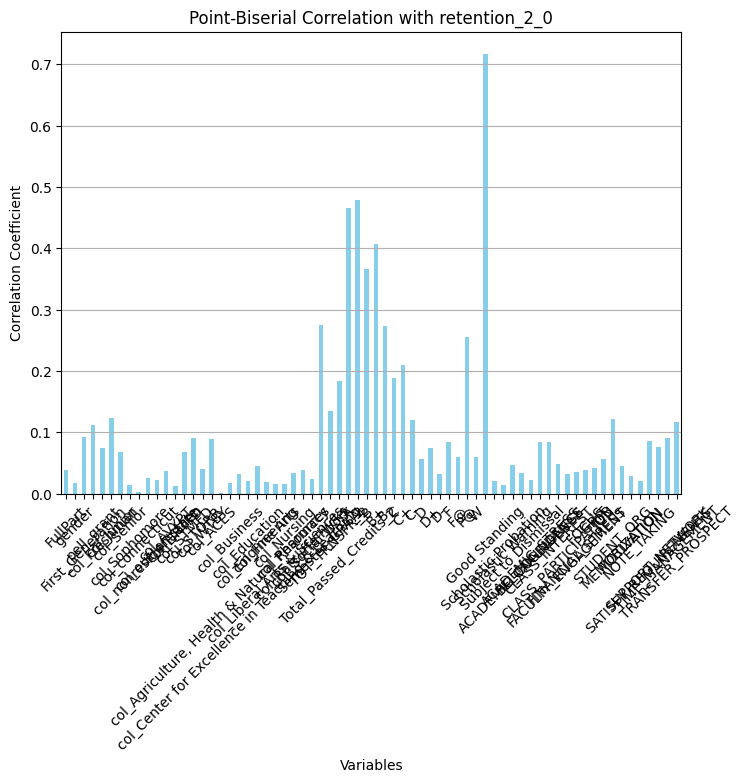

In [97]:
# Create a bar plot for the correlation coefficients
plt.figure(figsize=(8, 6))
correlation_series.plot(kind='bar', color='skyblue')
plt.title('Point-Biserial Correlation with retention_2_0')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [98]:
# Create dataframe for positive correlated columns
df = pd.DataFrame(correlation_series)
# Reset the Index
df = df.reset_index()

In [99]:
# Add retention_2_0 to the list
list = df['index'].to_list() + ['retention_2_0']

In [100]:
# Retention data_Set
retention_2_0_model_data = pre_final_merge[list]
retention_2_0_model_data.head()

,FullPart,gender,First_Generation,pell_grant,col_Freshman,col_Junior,col_Senior,col_Sophomore,col_connecticut,col_nonresident alien,...,JOB,STUDENT_ORG,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT,retention_2_0
0,0,1,0,0.00,0,0,1,0,1,0,...,1.0,0.0,5.0,5.0,5.000000,5.0,4.000000,5.000000,1.000000,0
1,0,0,0,0.25,0,0,0,1,1,0,...,1.0,0.0,3.0,4.0,3.333333,4.0,3.333333,3.333333,1.666667,0
2,1,1,0,0.00,0,1,0,0,1,0,...,1.0,0.0,4.0,5.0,4.000000,5.0,3.000000,5.000000,1.000000,0
3,1,1,0,0.00,1,0,0,0,1,0,...,0.0,0.0,4.0,5.0,4.000000,2.0,3.000000,5.000000,2.000000,0
4,1,1,0,0.00,0,0,1,0,1,0,...,1.0,0.0,4.0,2.0,5.000000,5.0,3.000000,5.000000,2.000000,1


In [101]:
retention_2_0_model_data.to_excel('retention_2_0_model_data.xlsx')

# Modeling

In [102]:
# sklearn functions for modeling
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# sklearn functions for logistic
from sklearn.linear_model import LogisticRegression

# models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [103]:
# load in data
model_file = retention_2_0_model_data
model_file.head()

,FullPart,gender,First_Generation,pell_grant,col_Freshman,col_Junior,col_Senior,col_Sophomore,col_connecticut,col_nonresident alien,...,JOB,STUDENT_ORG,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT,retention_2_0
0,0,1,0,0.00,0,0,1,0,1,0,...,1.0,0.0,5.0,5.0,5.000000,5.0,4.000000,5.000000,1.000000,0
1,0,0,0,0.25,0,0,0,1,1,0,...,1.0,0.0,3.0,4.0,3.333333,4.0,3.333333,3.333333,1.666667,0
2,1,1,0,0.00,0,1,0,0,1,0,...,1.0,0.0,4.0,5.0,4.000000,5.0,3.000000,5.000000,1.000000,0
3,1,1,0,0.00,1,0,0,0,1,0,...,0.0,0.0,4.0,5.0,4.000000,2.0,3.000000,5.000000,2.000000,0
4,1,1,0,0.00,0,0,1,0,1,0,...,1.0,0.0,4.0,2.0,5.000000,5.0,3.000000,5.000000,2.000000,1


In [104]:
# slicing the dataframe to remove unwanted columns from original file
df = model_file.iloc[0:,1:]
df.head()

,gender,First_Generation,pell_grant,col_Freshman,col_Junior,col_Senior,col_Sophomore,col_connecticut,col_nonresident alien,col_out_of_state,...,JOB,STUDENT_ORG,MEMORIZATION,MOTIVATION,NOTE_TAKING,SATISFY_REQUIREMENTS,SUPPORT_NETWORK,TIME_MANAGEMENT,TRANSFER_PROSPECT,retention_2_0
0,1,0,0.00,0,0,1,0,1,0,0,...,1.0,0.0,5.0,5.0,5.000000,5.0,4.000000,5.000000,1.000000,0
1,0,0,0.25,0,0,0,1,1,0,0,...,1.0,0.0,3.0,4.0,3.333333,4.0,3.333333,3.333333,1.666667,0
2,1,0,0.00,0,1,0,0,1,0,0,...,1.0,0.0,4.0,5.0,4.000000,5.0,3.000000,5.000000,1.000000,0
3,1,0,0.00,1,0,0,0,1,0,0,...,0.0,0.0,4.0,5.0,4.000000,2.0,3.000000,5.000000,2.000000,0
4,1,0,0.00,0,0,1,0,1,0,0,...,1.0,0.0,4.0,2.0,5.000000,5.0,3.000000,5.000000,2.000000,1


In [105]:
# list columns
df.columns

Index(['gender', 'First_Generation', 'pell_grant', 'col_Freshman',
       'col_Junior', 'col_Senior', 'col_Sophomore', 'col_connecticut',
       'col_nonresident alien', 'col_out_of_state', 'col_AVYPT', 'col_HRTFD',
       'col_STMFD', 'col_STORR', 'col_WTBY', 'col_ACES',
       'col_Agriculture, Health & Natural Resources', 'col_Business',
       'col_Center for Excellence in Teaching & Learning', 'col_Education',
       'col_Engineering', 'col_Fine Arts', 'col_Liberal Arts & Sciences',
       'col_Nursing', 'col_Pharmacy', 'col_Ratcliffe Hicks', 'col_Social Work',
       'Semester_GPA_2', 'TOT_TRNSFR_2', 'Total_Passed_Credits_2', 'A', 'A-',
       'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'F', 'F@', 'P@', 'W',
       'Good Standing', 'Scholastic Probation', 'Scholastic Warning',
       'Subject to Dismissal', 'ACADEMIC_CONFIDENCE', 'ACADEMIC_STRESS',
       'BELONGINGNESS', 'CLASS_INTEREST', 'CLASS_PARTICIPATION',
       'FACULTY_ENGAGEMENT', 'FINANCIAL_STRESS', 'FOCUS', 'GR


We opted to exclude these grades from the modeling process because they appear as significant columns that dominate the important features

In [106]:
# drop letter grade from dataset
df = df.drop(columns=['A', 'A-','B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'F', 'F@', 'P@', 'W'])

## Data Setup

In [107]:
df.columns

Index(['gender', 'First_Generation', 'pell_grant', 'col_Freshman',
       'col_Junior', 'col_Senior', 'col_Sophomore', 'col_connecticut',
       'col_nonresident alien', 'col_out_of_state', 'col_AVYPT', 'col_HRTFD',
       'col_STMFD', 'col_STORR', 'col_WTBY', 'col_ACES',
       'col_Agriculture, Health & Natural Resources', 'col_Business',
       'col_Center for Excellence in Teaching & Learning', 'col_Education',
       'col_Engineering', 'col_Fine Arts', 'col_Liberal Arts & Sciences',
       'col_Nursing', 'col_Pharmacy', 'col_Ratcliffe Hicks', 'col_Social Work',
       'Semester_GPA_2', 'TOT_TRNSFR_2', 'Total_Passed_Credits_2',
       'Good Standing', 'Scholastic Probation', 'Scholastic Warning',
       'Subject to Dismissal', 'ACADEMIC_CONFIDENCE', 'ACADEMIC_STRESS',
       'BELONGINGNESS', 'CLASS_INTEREST', 'CLASS_PARTICIPATION',
       'FACULTY_ENGAGEMENT', 'FINANCIAL_STRESS', 'FOCUS', 'GRIT', 'JOB',
       'STUDENT_ORG', 'MEMORIZATION', 'MOTIVATION', 'NOTE_TAKING',
       'SATI

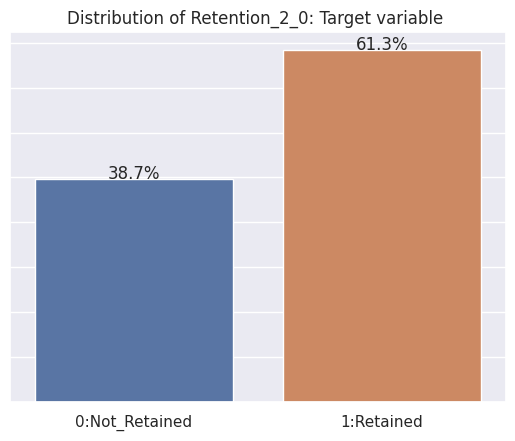

In [108]:
# create bar graph of retention_2_0
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x= 'retention_2_0',orient='v')

# Calculate and display percentages on the plot
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Remove y-labels (tick labels)
ax.set_yticklabels([])

# Remove y-axis title
ax.set_ylabel('')
ax.set_xlabel('')

# Remove y-labels (tick labels)
ax.set_yticklabels([])


# Change x-labels
new_labels = ['0:Not_Retained', '1:Retained']  # Replace with your desired labels
ax.set_xticklabels(new_labels)

# Title of the plot
plt.title("Distribution of Retention_2_0: Target variable ")

# Show the plot
plt.show()

In [109]:
# change retention_2_0 type to category
df['retention_2_0'] = df['retention_2_0'].astype('category')

In [110]:
df['retention_2_0'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

## Data Splitting

In [111]:
# Convert DataFrames to NumPy arrays
y = df['retention_2_0'] # Predictor variable
X = df.drop(columns=['retention_2_0','Semester_GPA_2','Good Standing',
       'Scholastic Probation', 'Scholastic Warning', 'Subject to Dismissal','JOB']) # Target Variable

In [112]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)

# Check the shapes of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (20508, 46)
Shape of X_test: (5128, 46)
Shape of y_train: (20508,)
Shape of y_test: (5128,)


In [113]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Data Scaling


In [114]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Algorithms

## Model 1: Logistic Regression

In [115]:
# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)

## Model 2: Random Forest

In [116]:
# Model 2: Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_preds = random_forest_model.predict(X_test)

## Model 3: Gradient Boosting (XGBoost)

In [117]:
# Model 3: Gradient Boosting (XGBoost)
xgboost_model = GradientBoostingClassifier()
xgboost_model.fit(X_train, y_train)
xgboost_preds = xgboost_model.predict(X_test)

## Model 5: Naive Bayes (BernoulliNB)

In [118]:
# Model 7: Naive Bayes (BernoulliNB)
naive_bayes_model = BernoulliNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_preds = naive_bayes_model.predict(X_test)

## Model :6 K-Nearest Neighbors (KNN)

In [119]:
# Model 8: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

## Model 7: Decision Trees

In [120]:
# Model 9: Decision Trees
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_preds = decision_tree_model.predict(X_test)

## Model 8: Ensemble Methods (AdaBoost)

In [121]:
# Model 10: Ensemble Methods (AdaBoost)
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
adaboost_model.fit(X_train, y_train)
adaboost_preds = adaboost_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Evaluate Models

In [122]:
def evaluate_model_with_plots(y_true, y_pred, model_name, model):
    # Classification Report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    if model_name not in ["SVM", "Neural Network (MLPClassifier)", "K-Nearest Neighbors (KNN)"]:
        print(f"{model_name} Confusion Matrix:")
        cm = confusion_matrix(y_true, y_pred)
        print(cm)

    # Sensitivity, Specificity, PPV, NPV
    if model_name not in ["SVM", "Neural Network (MLPClassifier)", "K-Nearest Neighbors (KNN)"]:
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        ppv = tp / (tp + fp)
        npv = tn / (tn + fn)
        print(f"{model_name} Sensitivity: {sensitivity:.2f}")
        print(f"{model_name} Specificity: {specificity:.2f}")
        print(f"{model_name} PPV (Positive Predictive Value): {ppv:.2f}")
        print(f"{model_name} NPV (Negative Predictive Value): {npv:.2f}")

# evaluate models
evaluate_model_with_plots(y_test, logistic_preds, "Logistic Regression", logistic_model)
print('\n')
evaluate_model_with_plots(y_test, random_forest_preds, "Random Forest", random_forest_model)
print('\n')
evaluate_model_with_plots(y_test, xgboost_preds, "Gradient Boosting (XGBoost)", xgboost_model)
print('\n')
evaluate_model_with_plots(y_test, naive_bayes_preds, "Naive Bayes (BernoulliNB)", naive_bayes_model)
print('\n')
evaluate_model_with_plots(y_test, knn_preds, "K-Nearest Neighbors (KNN)", knn_model)
print('\n')
evaluate_model_with_plots(y_test, decision_tree_preds, "Decision Trees", decision_tree_model)
print('\n')
evaluate_model_with_plots(y_test, adaboost_preds, "Ensemble Methods (AdaBoost)", adaboost_model)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1974
           1       0.70      0.88      0.78      3154

    accuracy                           0.70      5128
   macro avg       0.69      0.64      0.64      5128
weighted avg       0.69      0.70      0.68      5128

Logistic Regression Confusion Matrix:
[[ 800 1174]
 [ 383 2771]]
Logistic Regression Sensitivity: 0.88
Logistic Regression Specificity: 0.41
Logistic Regression PPV (Positive Predictive Value): 0.70
Logistic Regression NPV (Negative Predictive Value): 0.68


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1974
           1       0.90      0.87      0.88      3154

    accuracy                           0.86      5128
   macro avg       0.85      0.85      0.85      5128
weighted avg       0.86      0.86      0.86      5128

Random 

In [123]:
def evaluate_model_with_plots(y_true, y_pred, model_name, model):
    # Classification Report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    if model_name not in ["SVM", "Neural Network (MLPClassifier)", "K-Nearest Neighbors (KNN)"]:
        print(f"{model_name} Confusion Matrix:")
        cm = confusion_matrix(y_true, y_pred)
        print(cm)

    # Sensitivity, Specificity, PPV, NPV
    if model_name not in ["SVM", "Neural Network (MLPClassifier)", "K-Nearest Neighbors (KNN)"]:
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        ppv = tp / (tp + fp)
        npv = tn / (tn + fn)
        print(f"{model_name} Sensitivity: {sensitivity:.2f}")
        print(f"{model_name} Specificity: {specificity:.2f}")
        print(f"{model_name} PPV (Positive Predictive Value): {ppv:.2f}")
        print(f"{model_name} NPV (Negative Predictive Value): {npv:.2f}")

# evaluate models
evaluate_model_with_plots(y_test, logistic_preds, "Logistic Regression", logistic_model)
evaluate_model_with_plots(y_test, random_forest_preds, "Random Forest", random_forest_model)
evaluate_model_with_plots(y_test, xgboost_preds, "Gradient Boosting (XGBoost)", xgboost_model)
evaluate_model_with_plots(y_test, naive_bayes_preds, "Naive Bayes (BernoulliNB)", naive_bayes_model)
evaluate_model_with_plots(y_test, knn_preds, "K-Nearest Neighbors (KNN)", knn_model)
evaluate_model_with_plots(y_test, decision_tree_preds, "Decision Trees", decision_tree_model)
evaluate_model_with_plots(y_test, adaboost_preds, "Ensemble Methods (AdaBoost)", adaboost_model)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1974
           1       0.70      0.88      0.78      3154

    accuracy                           0.70      5128
   macro avg       0.69      0.64      0.64      5128
weighted avg       0.69      0.70      0.68      5128

Logistic Regression Confusion Matrix:
[[ 800 1174]
 [ 383 2771]]
Logistic Regression Sensitivity: 0.88
Logistic Regression Specificity: 0.41
Logistic Regression PPV (Positive Predictive Value): 0.70
Logistic Regression NPV (Negative Predictive Value): 0.68
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1974
           1       0.90      0.87      0.88      3154

    accuracy                           0.86      5128
   macro avg       0.85      0.85      0.85      5128
weighted avg       0.86      0.86      0.86      5128

Random Fo

## Significant Columns evaluation

Logistic Regression

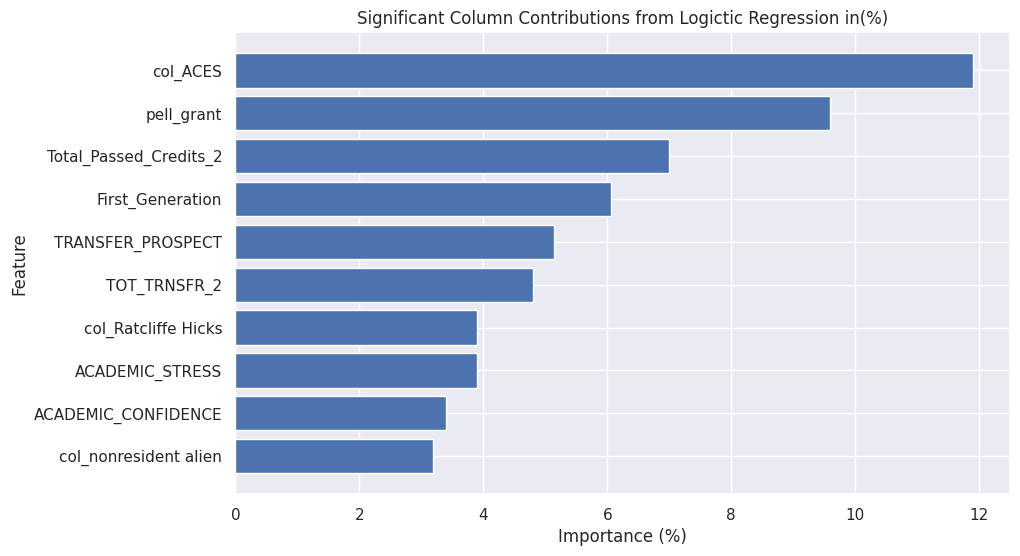

,Feature,Importance
8,col_nonresident alien,3.183646
29,ACADEMIC_CONFIDENCE,3.392673
30,ACADEMIC_STRESS,3.896513
25,col_Ratcliffe Hicks,3.905277
27,TOT_TRNSFR_2,4.807323
45,TRANSFER_PROSPECT,5.140627
1,First_Generation,6.067018
28,Total_Passed_Credits_2,6.995194
2,pell_grant,9.588444
15,col_ACES,11.906490


In [124]:
coefficients = logistic_model.coef_[0]

# Calculate the sum of absolute coefficients to get the total
total_coefficients = np.sum(np.abs(coefficients))

# Convert coefficients to percentages
coefficients_percentage = (np.abs(coefficients) / total_coefficients) * 100

# Create a DataFrame with feature names and their absolute coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance':coefficients_percentage})

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Select the top N features (e.g., top 11)
top_features = feature_importance.head(10)

# Sort the top features by importance in ascending order (you can change it to ascending=False if you want descending order)
top_features = top_features.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Significant Column Contributions from Logictic Regression in(%)')
plt.show()

display(top_features)

XGBoost

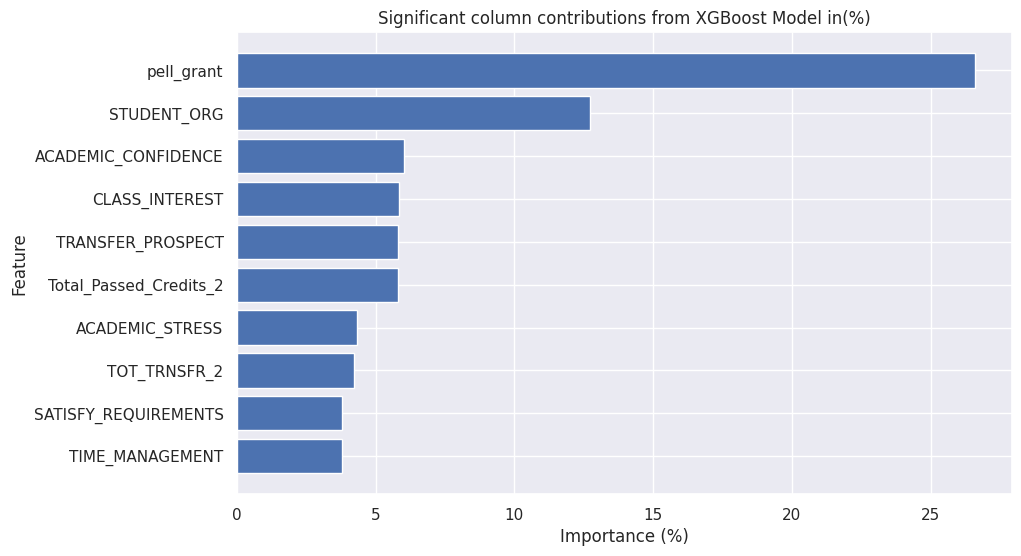

,Feature,Importance
44,TIME_MANAGEMENT,3.798646
42,SATISFY_REQUIREMENTS,3.805653
27,TOT_TRNSFR_2,4.236513
30,ACADEMIC_STRESS,4.328599
28,Total_Passed_Credits_2,5.816256
45,TRANSFER_PROSPECT,5.822760
32,CLASS_INTEREST,5.849572
29,ACADEMIC_CONFIDENCE,6.010458
38,STUDENT_ORG,12.740310
2,pell_grant,26.597790


In [125]:
importance = xgboost_model.feature_importances_

# Calculate sum of importances to get the total
total_importance = np.sum(importance)

# Convert importances to percentages
importance_percentage = (importance / total_importance) * 100

# Create a DataFrame with feature names and their importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance_percentage})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Select the top N features (e.g., top 11)
top_features = feature_importance.head(10)

# Sort the top features by importance in descending order
top_features = top_features.sort_values(by='Importance', ascending=True)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Significant column contributions from XGBoost Model in(%)')
plt.show()


display(top_features)

Decision Tree

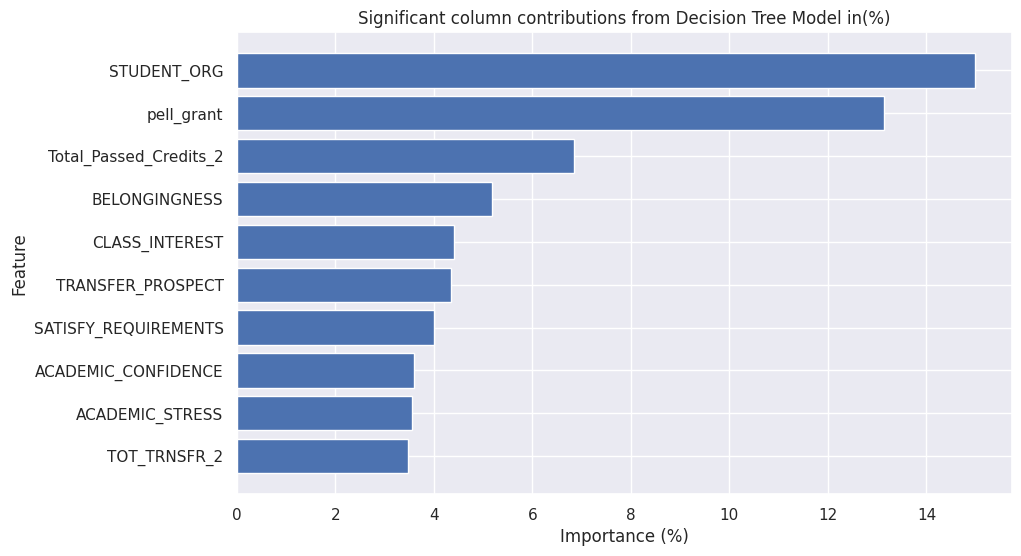

,Feature,Importance
27,TOT_TRNSFR_2,3.480580
30,ACADEMIC_STRESS,3.560275
29,ACADEMIC_CONFIDENCE,3.597092
42,SATISFY_REQUIREMENTS,4.001848
45,TRANSFER_PROSPECT,4.344944
32,CLASS_INTEREST,4.402236
31,BELONGINGNESS,5.190909
28,Total_Passed_Credits_2,6.842675
2,pell_grant,13.146216
38,STUDENT_ORG,14.981387


In [126]:
importance = decision_tree_model.feature_importances_

# Calculate sum of importances to get the total
total_importance = np.sum(importance)

# Convert importances to percentages
importance_percentage = (importance / total_importance) * 100

# Create a DataFrame with feature names and their importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance_percentage})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Select the top N features (e.g., top 11)
top_features = feature_importance.head(10)
# Sort the top features by importance in descending order
top_features = top_features.sort_values(by='Importance', ascending=True)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Significant column contributions from Decision Tree Model in(%)')
plt.show()

display(top_features)

Random_forest_model

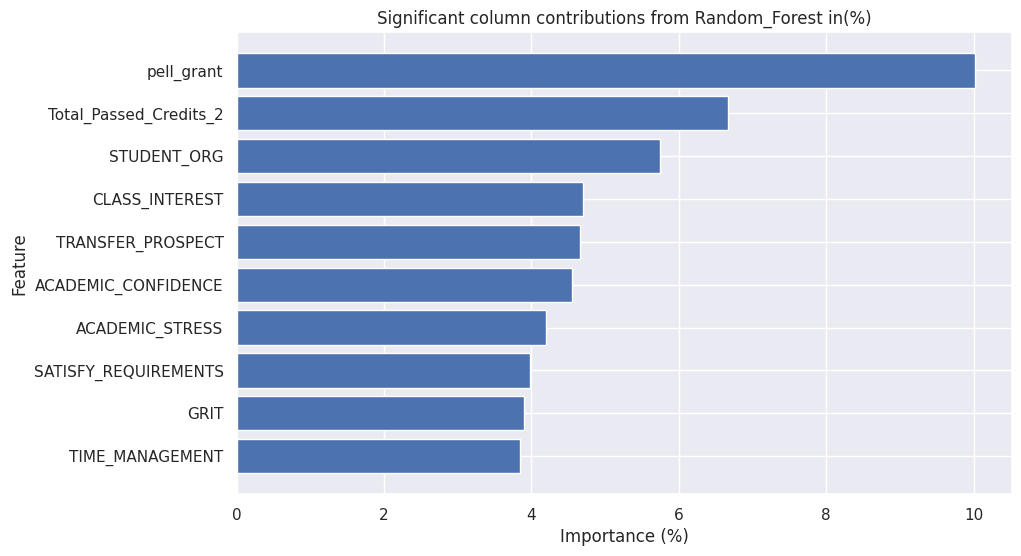

,Feature,Importance
44,TIME_MANAGEMENT,3.838850
37,GRIT,3.895435
42,SATISFY_REQUIREMENTS,3.983367
30,ACADEMIC_STRESS,4.203531
29,ACADEMIC_CONFIDENCE,4.552338
45,TRANSFER_PROSPECT,4.652181
32,CLASS_INTEREST,4.696437
38,STUDENT_ORG,5.744976
28,Total_Passed_Credits_2,6.666326
2,pell_grant,10.017282


In [127]:
importance = random_forest_model.feature_importances_

# Calculate sum of importances to get the total
total_importance = np.sum(importance)

# Convert importances to percentages
importance_percentage = (importance / total_importance) * 100

# Create a DataFrame with feature names and their importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance_percentage})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Select the top N features (e.g., top 11)
top_features = feature_importance.head(10)
# Sort the top features by importance in descending order
top_features = top_features.sort_values(by='Importance', ascending=True)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Significant column contributions from Random_Forest in(%)')
plt.show()

display(top_features)